# scout project Balint Part 3: dealing with outliers

In [1128]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import warnings;
warnings.filterwarnings("ignore")
import re

In [1129]:
df = pd.read_csv('data/clean_filled_auto_scout.csv')

In [1130]:
missing_values = df.isna().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

Series([], dtype: int64)


## Price

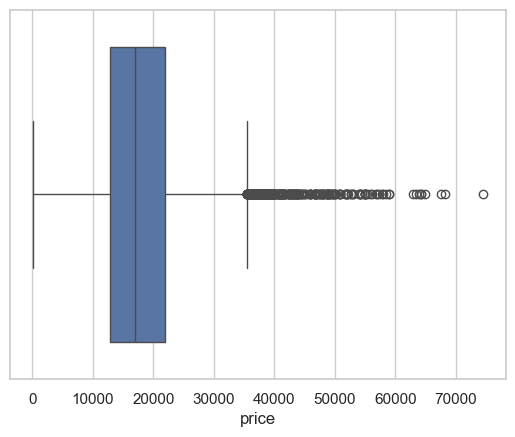

In [1131]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["price"])

In [1132]:
df.sort_values(by = 'price').head()

,make_model,price,fuel,particulate_filter,multiple_fuel,gearingtype,air_conditioning,armrest,automatic_climate_control,cruise_control,...,gears,interior_material,warranty_months,drivechain,hp,displacement,cylinders,inspectionnew,weight,consumption_comb
8594,Opel Corsa,13,gasoline,0,0,Manual,1,0,0,1,...,5.0,Cloth,0.0,front,66.0,1398.0,4.0,No,1141.0,5.6
8828,Opel Corsa,120,gasoline,0,0,Manual,1,0,1,1,...,6.0,Cloth,0.0,front,66.0,999.0,3.0,No,1099.0,4.6
6066,Opel Astra,255,diesel,1,0,Manual,1,0,0,1,...,6.0,Cloth,0.0,front,100.0,1598.0,4.0,No,1403.0,3.8
8829,Opel Corsa,331,gasoline,0,0,Manual,1,1,1,1,...,6.0,Cloth,0.0,front,66.0,999.0,3.0,No,1163.0,4.6
8827,Opel Corsa,4950,diesel,1,0,Manual,1,0,1,0,...,5.0,Cloth,0.0,front,70.0,1248.0,4.0,No,1163.0,3.2


In [1133]:
# Drop bottom four price outliers
df.drop(df.loc[df['price'] < 1000].index, inplace=True)
df.sort_values(by = 'price').head()

,make_model,price,fuel,particulate_filter,multiple_fuel,gearingtype,air_conditioning,armrest,automatic_climate_control,cruise_control,...,gears,interior_material,warranty_months,drivechain,hp,displacement,cylinders,inspectionnew,weight,consumption_comb
8827,Opel Corsa,4950,diesel,1,0,Manual,1,0,1,0,...,5.0,Cloth,0.0,front,70.0,1248.0,4.0,No,1163.0,3.2
8825,Opel Corsa,4990,gasoline,0,0,Manual,1,0,0,1,...,5.0,Cloth,0.0,front,66.0,1398.0,4.0,No,1141.0,5.2
8826,Opel Corsa,5250,diesel,0,0,Manual,1,0,0,0,...,5.0,Cloth,12.0,front,55.0,1248.0,4.0,No,1199.0,3.8
8824,Opel Corsa,5300,diesel,1,0,Manual,1,0,0,0,...,5.0,Cloth,0.0,front,55.0,1248.0,4.0,No,1237.0,3.9
13770,Renault Clio,5445,diesel,0,0,Manual,1,0,0,0,...,5.0,Cloth,0.0,front,55.0,1461.0,4.0,No,1146.0,3.6


## previous_owners

In [1134]:
df.previous_owners.value_counts(dropna=False)

previous_owners
1.0    12165
0.0     2961
2.0      770
3.0       17
4.0        2
Name: count, dtype: int64

## horsepower

<Axes: xlabel='make_model', ylabel='hp'>

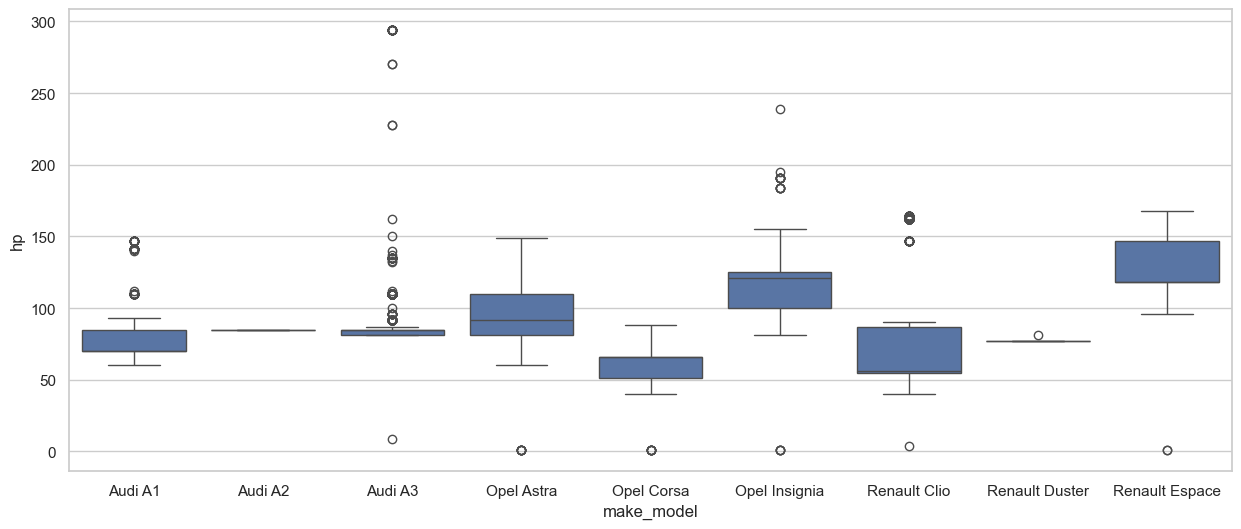

In [1135]:
plt.figure(figsize=(15,6))
sns.boxplot(x = 'make_model', y= 'hp', data = df)

In [1136]:
# Convert values <25 to np.nan
df.loc[df['hp'] < 25, 'hp'] = np.nan
df["hp"].isna().sum()

np.int64(22)

In [1137]:
mode_hp = df.groupby(['make_model','body','displacement'])['hp']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
df["hp"] = df["hp"].fillna(mode_hp)
df["hp"].isna().sum()

np.int64(2)

In [1138]:
mode_hp1 = df.groupby(['make_model','displacement'])['hp']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
df["hp"] = df["hp"].fillna(mode_hp1)
df['hp'].isna().sum()

np.int64(2)

In [1139]:
mode_hp2 = df.groupby(['make_model'])['hp']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
df["hp"] = df["hp"].fillna(mode_hp2)
df['hp'].isna().sum()

np.int64(0)

<Axes: >

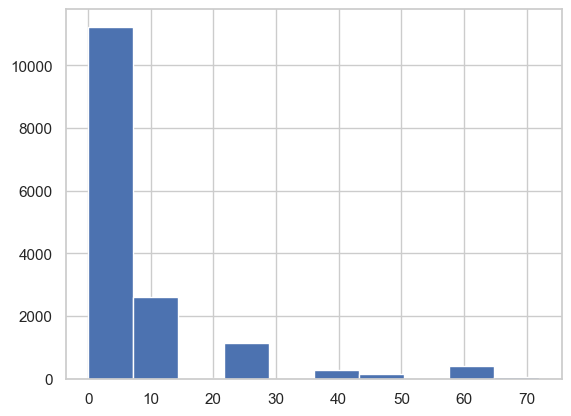

In [1140]:
df.warranty_months.hist()

## gears column

In [1141]:
df['gears'].value_counts(dropna = False)

gears
6.0     8612
5.0     4254
7.0     2810
8.0      225
9.0        6
1.0        2
4.0        2
3.0        2
2.0        1
50.0       1
Name: count, dtype: int64

In [1142]:
df[df['gears'].isin([1,2,9,50])]

,make_model,price,fuel,particulate_filter,multiple_fuel,gearingtype,air_conditioning,armrest,automatic_climate_control,cruise_control,...,gears,interior_material,warranty_months,drivechain,hp,displacement,cylinders,inspectionnew,weight,consumption_comb
8921,Opel Corsa,11000,gasoline,0,0,Semi-automatic,1,0,0,0,...,1.0,Cloth,24.0,front,66.0,1398.0,4.0,No,1163.0,4.8
9812,Opel Corsa,9880,gasoline,0,0,Manual,1,0,0,0,...,2.0,Cloth,12.0,front,51.0,1229.0,4.0,No,1163.0,5.3
14375,Renault Clio,23990,gasoline,0,0,Automatic,1,0,1,1,...,1.0,Cloth,48.0,front,147.0,1618.0,4.0,No,1288.0,5.9
14495,Renault Clio,10798,super95,0,0,Manual,1,0,0,1,...,50.0,Cloth,0.0,front,56.0,898.0,3.0,No,1165.0,5.2
15812,Renault Espace,54982,gasoline,0,0,Automatic,1,1,1,1,...,9.0,Part leather,0.0,front,165.0,1798.0,4.0,No,1647.0,7.6
15814,Renault Espace,54982,gasoline,0,0,Automatic,1,1,1,1,...,9.0,Part leather,0.0,front,165.0,1798.0,4.0,No,1647.0,7.6
15824,Renault Espace,52711,gasoline,0,0,Automatic,1,1,1,1,...,9.0,Part leather,0.0,front,165.0,1798.0,4.0,No,1608.0,7.4
15827,Renault Espace,52711,gasoline,0,0,Automatic,1,1,1,1,...,9.0,Part leather,0.0,front,165.0,1798.0,4.0,No,1608.0,7.4
15869,Renault Espace,49100,diesel,0,0,Automatic,1,1,1,1,...,9.0,Part leather,0.0,front,146.0,1997.0,4.0,No,1740.0,5.3
15876,Renault Espace,48765,gasoline,0,0,Automatic,1,1,1,1,...,9.0,Part leather,0.0,front,165.0,1798.0,4.0,No,1608.0,7.4


In [1143]:
# Assign cars with <5 gears, 5 gears
df.loc[df['gears']<5, 'gears'] = 5

In [1144]:
df.loc[df.gears==50,'gears'] = 5

In [1145]:
df[df['gears'] ==9]

,make_model,price,fuel,particulate_filter,multiple_fuel,gearingtype,air_conditioning,armrest,automatic_climate_control,cruise_control,...,gears,interior_material,warranty_months,drivechain,hp,displacement,cylinders,inspectionnew,weight,consumption_comb
15812,Renault Espace,54982,gasoline,0,0,Automatic,1,1,1,1,...,9.0,Part leather,0.0,front,165.0,1798.0,4.0,No,1647.0,7.6
15814,Renault Espace,54982,gasoline,0,0,Automatic,1,1,1,1,...,9.0,Part leather,0.0,front,165.0,1798.0,4.0,No,1647.0,7.6
15824,Renault Espace,52711,gasoline,0,0,Automatic,1,1,1,1,...,9.0,Part leather,0.0,front,165.0,1798.0,4.0,No,1608.0,7.4
15827,Renault Espace,52711,gasoline,0,0,Automatic,1,1,1,1,...,9.0,Part leather,0.0,front,165.0,1798.0,4.0,No,1608.0,7.4
15869,Renault Espace,49100,diesel,0,0,Automatic,1,1,1,1,...,9.0,Part leather,0.0,front,146.0,1997.0,4.0,No,1740.0,5.3
15876,Renault Espace,48765,gasoline,0,0,Automatic,1,1,1,1,...,9.0,Part leather,0.0,front,165.0,1798.0,4.0,No,1608.0,7.4


In [1146]:
df[(df['make_model'] == 'Renault Espace') & (df['displacement'] > 1700)].gears.value_counts()

gears
6.0    198
7.0     95
9.0      6
5.0      4
Name: count, dtype: int64

In [1147]:
df.gears.value_counts()

gears
6.0    8612
5.0    4262
7.0    2810
8.0     225
9.0       6
Name: count, dtype: int64

## bodycolor

In [1148]:
df['bodycolor'].value_counts()

bodycolor
Black     3941
Grey      3838
White     3468
Silver    1647
Blue      1431
Red        957
Brown      289
Green      158
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Name: count, dtype: int64

In [1149]:
# replace values with <500 counts with 'Others'
df['bodycolor'] = df.bodycolor.replace(['Yellow','Violet','Bronze','Orange','Beige', 'Green','Brown'], 'Others')

## nr of doors

In [1150]:
df['nrofdoors'].value_counts()

nrofdoors
5.0    11784
4.0     3079
3.0      831
2.0      219
1.0        1
7.0        1
Name: count, dtype: int64

In [1151]:
df.loc[(df.nrofdoors == 2) | (df.nrofdoors == 1),'nrofdoors'] = 3

In [1152]:
df.loc[(df.nrofdoors == 4) | (df.nrofdoors == 7),'nrofdoors'] = 5

Make nrofdoors include the trunk

In [1153]:
df['nrofdoors'].value_counts()

nrofdoors
5.0    14864
3.0     1051
Name: count, dtype: int64

## nrofseats

In [1154]:
df['nrofseats'].value_counts(dropna= False)

nrofseats
5.0    14304
4.0     1127
7.0      362
2.0      119
6.0        2
3.0        1
Name: count, dtype: int64

In [1155]:
df.loc[df['nrofseats'].isin([6, 3])][['make_model','body']]

,make_model,body
582,Audi A1,Compact
1636,Audi A1,Compact
15890,Renault Espace,Station wagon


In [1156]:
df[(df['make_model']== 'Audi A1') & (df['body'] == 'Compact')]['nrofseats'].mode()[0]

np.float64(5.0)

In [1157]:
df[(df['make_model']== 'Renault Espace') & (df['body'] == 'Station wagon')]['nrofseats'].mode()[0]

np.float64(5.0)

In [1158]:
df.loc[[582,1636,15890], 'nrofseats'] = 5

In [1159]:
df['nrofseats'].value_counts(dropna= False)

nrofseats
5.0    14307
4.0     1127
7.0      362
2.0      119
Name: count, dtype: int64

## consumption combined

In [1160]:
df['consumption_comb']

0        3.8
1        5.6
2        3.8
3        3.8
4        4.1
        ... 
15914    5.3
15915    7.4
15916    5.3
15917    5.3
15918    6.8
Name: consumption_comb, Length: 15915, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Audi A1'),
  Text(1, 0, 'Audi A2'),
  Text(2, 0, 'Audi A3'),
  Text(3, 0, 'Opel Astra'),
  Text(4, 0, 'Opel Corsa'),
  Text(5, 0, 'Opel Insignia'),
  Text(6, 0, 'Renault Clio'),
  Text(7, 0, 'Renault Duster'),
  Text(8, 0, 'Renault Espace')])

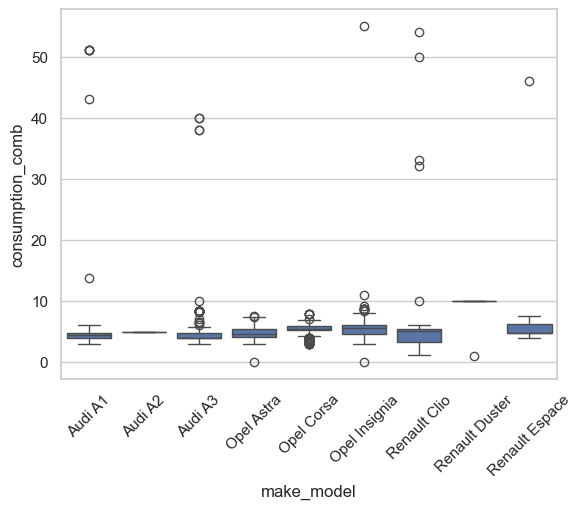

In [1161]:
sns.boxplot(y='consumption_comb',data=df, x='make_model')
plt.xticks(rotation=45)


In [1162]:
df.loc[(df['consumption_comb']>20)|(df['consumption_comb']<3), 'consumption_comb'] = np.nan

In [1163]:
df.consumption_comb.describe()

count    15896.000000
mean         4.831609
std          0.933004
min          3.000000
25%          4.100000
50%          4.800000
75%          5.400000
max         13.800000
Name: consumption_comb, dtype: float64

In [1164]:
df.consumption_comb.isna().sum(0)

np.int64(19)

In [1165]:
mode_comb = df.groupby(['co2emission','displacement','fuel'])['consumption_comb'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
df['consumption_comb'] = df['consumption_comb'].fillna(mode_comb)
df['consumption_comb'].isna().sum()

np.int64(5)

In [1166]:
mode_comb1 = df.groupby(['displacement'])['consumption_comb'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
df['consumption_comb'] = df['consumption_comb'].fillna(mode_comb1)
df['consumption_comb'].isna().sum()

np.int64(0)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Audi A1'),
  Text(1, 0, 'Audi A2'),
  Text(2, 0, 'Audi A3'),
  Text(3, 0, 'Opel Astra'),
  Text(4, 0, 'Opel Corsa'),
  Text(5, 0, 'Opel Insignia'),
  Text(6, 0, 'Renault Clio'),
  Text(7, 0, 'Renault Duster'),
  Text(8, 0, 'Renault Espace')])

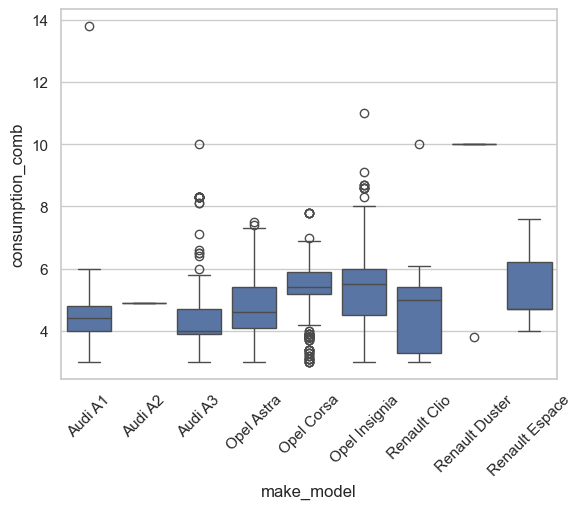

In [1167]:
sns.boxplot(x = 'make_model', y = 'consumption_comb', data = df)
plt.xticks(rotation=45)


## displacement

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Audi A1'),
  Text(1, 0, 'Audi A2'),
  Text(2, 0, 'Audi A3'),
  Text(3, 0, 'Opel Astra'),
  Text(4, 0, 'Opel Corsa'),
  Text(5, 0, 'Opel Insignia'),
  Text(6, 0, 'Renault Clio'),
  Text(7, 0, 'Renault Duster'),
  Text(8, 0, 'Renault Espace')])

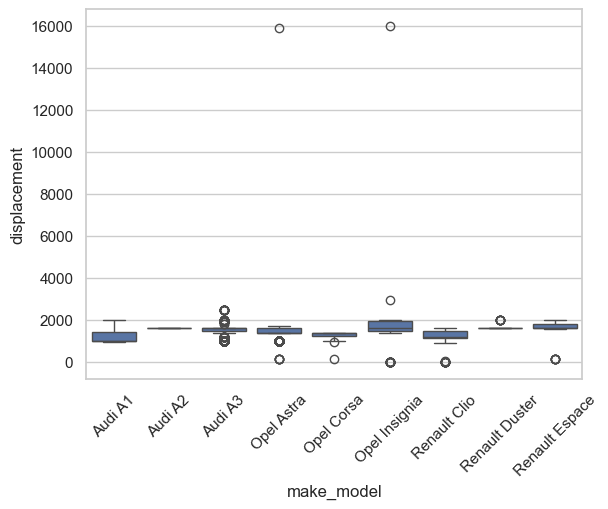

In [1168]:
sns.boxplot(x = 'make_model', y = 'displacement', data = df)
plt.xticks(rotation = 45)

In [1169]:
df.loc[(df['displacement'] > 5000)| (df['displacement'] < 600), 'displacement'] = np.nan

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Audi A1'),
  Text(1, 0, 'Audi A2'),
  Text(2, 0, 'Audi A3'),
  Text(3, 0, 'Opel Astra'),
  Text(4, 0, 'Opel Corsa'),
  Text(5, 0, 'Opel Insignia'),
  Text(6, 0, 'Renault Clio'),
  Text(7, 0, 'Renault Duster'),
  Text(8, 0, 'Renault Espace')])

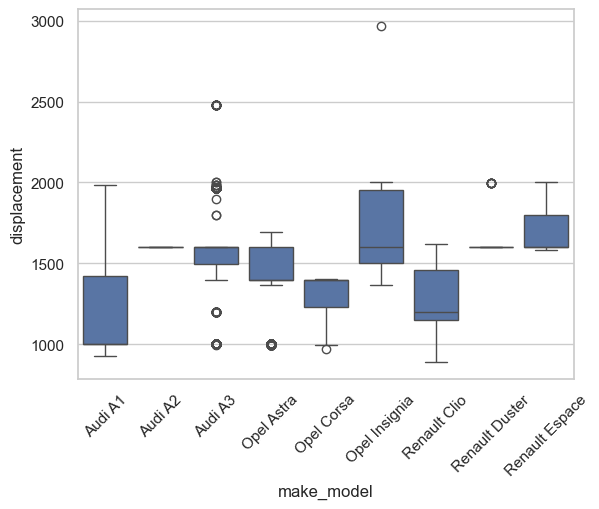

In [1170]:
sns.boxplot(x = 'make_model', y = 'displacement', data = df)
plt.xticks(rotation = 45)

In [1171]:
df['displacement'].isna().sum()

np.int64(53)

In [1172]:
mode_displacement = df.groupby(['make_model', 'type','hp'])['displacement'].transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
df['displacement'] = df['displacement'].fillna(mode_displacement)
df['displacement'].isna().sum()

np.int64(0)

## cylinders

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Audi A1'),
  Text(1, 0, 'Audi A2'),
  Text(2, 0, 'Audi A3'),
  Text(3, 0, 'Opel Astra'),
  Text(4, 0, 'Opel Corsa'),
  Text(5, 0, 'Opel Insignia'),
  Text(6, 0, 'Renault Clio'),
  Text(7, 0, 'Renault Duster'),
  Text(8, 0, 'Renault Espace')])

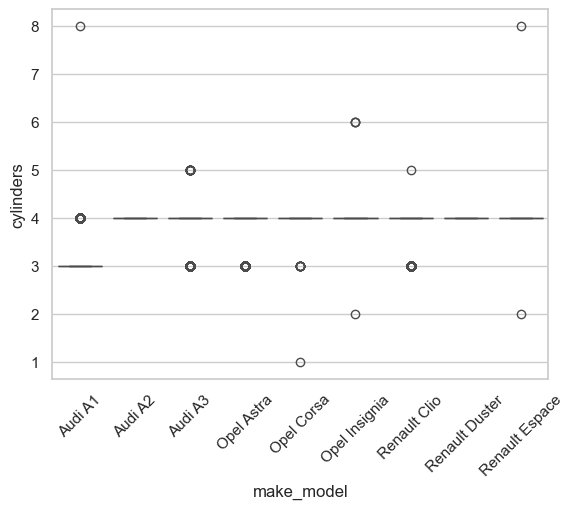

In [1173]:
sns.boxplot(x='make_model', y='cylinders',data=df)
plt.xticks(rotation = 45)

In [1174]:
#Convert cylinder outliers to 4
df.loc[df['cylinders'].isin([1,2,8]), 'cylinders'] = 4

In [1175]:
df['cylinders'].value_counts(dropna = False)

cylinders
4.0    12470
3.0     3420
5.0       22
6.0        3
Name: count, dtype: int64

## weight

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Audi A1'),
  Text(1, 0, 'Audi A2'),
  Text(2, 0, 'Audi A3'),
  Text(3, 0, 'Opel Astra'),
  Text(4, 0, 'Opel Corsa'),
  Text(5, 0, 'Opel Insignia'),
  Text(6, 0, 'Renault Clio'),
  Text(7, 0, 'Renault Duster'),
  Text(8, 0, 'Renault Espace')])

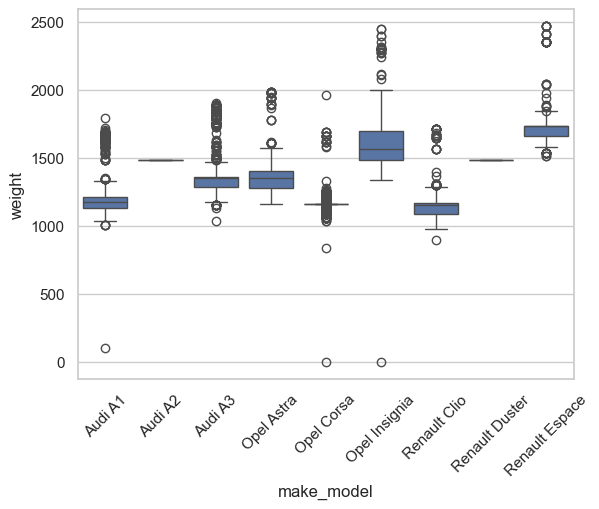

In [1176]:
sns.boxplot(x='make_model', y='weight',data=df)
plt.xticks(rotation = 45)

In [1177]:
df.loc[df['weight'] <500, 'weight'] = np.nan

In [1178]:
df.weight.isna().sum()

np.int64(3)

In [1179]:
mode_weight = df.groupby([
    'make_model',
    'body',
    'displacement'
])['weight'].transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)

df['weight'] = df['weight'].fillna(mode_weight)
df['weight'].isna().sum()

np.int64(0)

## co2 emission

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Audi A1'),
  Text(1, 0, 'Audi A2'),
  Text(2, 0, 'Audi A3'),
  Text(3, 0, 'Opel Astra'),
  Text(4, 0, 'Opel Corsa'),
  Text(5, 0, 'Opel Insignia'),
  Text(6, 0, 'Renault Clio'),
  Text(7, 0, 'Renault Duster'),
  Text(8, 0, 'Renault Espace')])

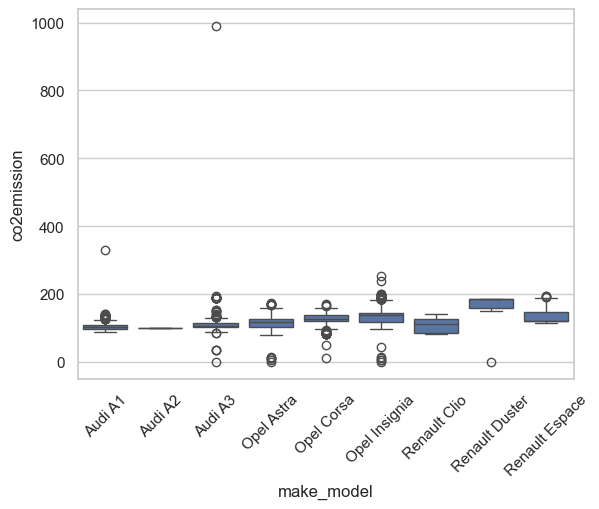

In [1180]:
sns.boxplot(x='make_model', y='co2emission',data=df)
plt.xticks(rotation = 45)


In [1181]:
df.loc[(df['co2emission']> 300) | (df['co2emission']< 70), 'co2emission'] = np.nan

(0.0, 1000.0)

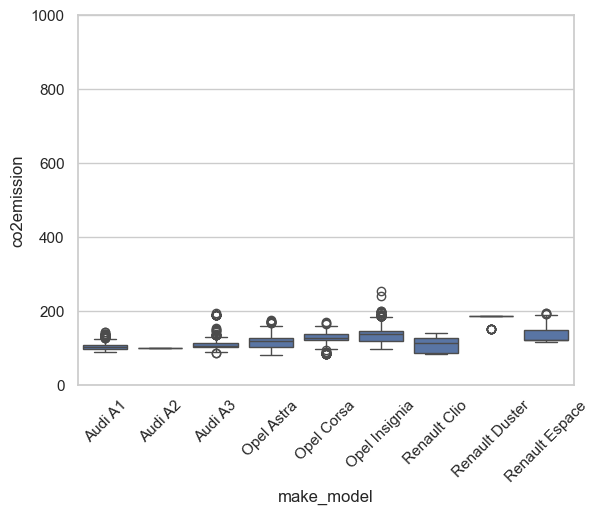

In [1182]:
sns.boxplot(x='make_model', y='co2emission',data=df)
plt.xticks(rotation = 45)
plt.ylim(0,1000)

In [1183]:
df['co2emission'].isna().sum()

np.int64(21)

In [1184]:
mode_co2 = df.groupby(['make_model', 'fuel','displacement'])['co2emission'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
df['co2emission'] = df['co2emission'].fillna(mode_co2)
df['co2emission'].isna().sum()

np.int64(0)

## type

In [1185]:
df.type.value_counts()

type
Used              11097
New                1647
Pre-registered     1364
Employee's car     1011
Demonstration       796
Name: count, dtype: int64

In [1186]:
df[df['type'] == 'New']['km'].describe()

count    1647.000000
mean       77.362174
std       207.242615
min         0.000000
25%        10.000000
50%        11.000000
75%       100.000000
max      3000.000000
Name: km, dtype: float64

In [1187]:
df[(df.km > 1000) & (df.type == 'New')]

,make_model,price,fuel,particulate_filter,multiple_fuel,gearingtype,air_conditioning,armrest,automatic_climate_control,cruise_control,...,gears,interior_material,warranty_months,drivechain,hp,displacement,cylinders,inspectionnew,weight,consumption_comb
9887,Opel Corsa,17490,super95,0,1,Automatic,1,0,0,1,...,6.0,Cloth,0.0,front,66.0,1398.0,4.0,Yes,1237.0,5.2
9933,Opel Corsa,17250,super95,0,0,Automatic,1,0,0,1,...,6.0,Cloth,0.0,front,66.0,1398.0,4.0,No,1199.0,6.0
10043,Opel Corsa,15950,super95,0,1,Automatic,1,0,1,1,...,6.0,Cloth,0.0,front,66.0,1398.0,4.0,No,1199.0,6.0
15299,Renault Espace,46895,diesel,1,0,Manual,1,1,1,1,...,6.0,Part leather,0.0,front,147.0,1997.0,4.0,No,2044.0,5.4
15821,Renault Espace,50950,diesel,1,0,Automatic,1,1,1,1,...,6.0,Other,0.0,front,147.0,1997.0,4.0,No,1840.0,5.7
15884,Renault Espace,42990,super95,1,0,Automatic,1,0,1,0,...,6.0,Full leather,0.0,front,165.0,1798.0,4.0,No,1685.0,7.4
15890,Renault Espace,42490,diesel,1,0,Automatic,1,1,1,1,...,6.0,Cloth,0.0,front,147.0,1997.0,4.0,No,1840.0,5.7
15902,Renault Espace,41043,diesel,1,0,Automatic,1,1,1,1,...,6.0,Part leather,0.0,front,147.0,1997.0,4.0,No,2044.0,5.3


In [1188]:
df.loc[(df.age > 0) & (df.type == 'New'), 'type'] = 'Used'
df.type.value_counts()

type
Used              11099
New                1645
Pre-registered     1364
Employee's car     1011
Demonstration       796
Name: count, dtype: int64

## fuel

In [1189]:
df.fuel.value_counts()

fuel
diesel      7297
super95     4466
gasoline    3728
other        424
Name: count, dtype: int64

## interior material

In [1190]:
df.interior_material.value_counts()

interior_material
Cloth           12460
Part leather     1552
Full leather     1382
Other             404
Velour             60
alcantara          57
Name: count, dtype: int64

In [1191]:
# Combine into larger, more general categories
df.loc[df['interior_material'].isin(['Part leather', 'Full leather']), 'interior_material'] = 'Leather'
df.loc[df['interior_material'] == 'Velour', 'interior_material'] = 'Cloth'
df.loc[df['interior_material'] == 'alcantara', 'interior_material'] = 'Other'
df.interior_material.value_counts()

interior_material
Cloth      12520
Leather     2934
Other        461
Name: count, dtype: int64

In [1192]:
list(df.columns)

['make_model',
 'price',
 'fuel',
 'particulate_filter',
 'multiple_fuel',
 'gearingtype',
 'air_conditioning',
 'armrest',
 'automatic_climate_control',
 'cruise_control',
 'electric_tailgate',
 'electrical_side_mirrors',
 'electrically_adjustable_seats',
 'electrically_heated_windshield',
 'heads-up_display',
 'heated_steering_wheel',
 'hill_holder',
 'keyless_central_door_lock',
 'leather_steering_wheel',
 'light_sensor',
 'lumbar_support',
 'multi-function_steering_wheel',
 'navigation_system',
 'panorama_roof',
 'park_distance_control',
 'parking_assist_system_camera',
 'parking_assist_system_self-steering',
 'parking_assist_system_sensors_front',
 'parking_assist_system_sensors_rear',
 'power_windows',
 'rain_sensor',
 'seat_heating',
 'seat_ventilation',
 'split_rear_seats',
 'start-stop_system',
 'tinted_windows',
 'bluetooth',
 'cd_player',
 'digital_radio',
 'hands-free_equipment',
 'mp3',
 'on-board_computer',
 'radio',
 'sound_system',
 'usb',
 'alloy_wheels',
 'catalytic_c

In [1193]:
df.inspectionnew.value_counts()

inspectionnew
No     11983
Yes     3932
Name: count, dtype: int64

## make_model

In [1194]:
df.make_model.value_counts()

make_model
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: count, dtype: int64

Audi A2 were made only from 1999-2005, so can't be age 1. Drop this row

In [1195]:
df.loc[df['make_model'] == 'Audi A2'].index

Index([2614], dtype='int64')

In [1196]:
df.drop(index=[2614], inplace=True)
df.reset_index(drop=True, inplace=True)

# A couple of checks

In [1197]:
missing_values = df.isna().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

Series([], dtype: int64)


# Save output for get_dummies

In [1198]:
df.to_csv('data/auto_scout_outlier.csv', index=False)